In [1]:
import numpy as np
from sparseSampling import sparseSampling
from EISGame import EISGame
from valueIteration import valueIteration
from discretizer import discretizer
from EIS import SLModel
import pprint
import matplotlib.pyplot as plt

In [2]:
# Parameters
Rmax = 1.5
epsilon = 0.5
gamma = 0.3
stateRange = [-1,1]
numIntervals = 20
C = 20
H = 3
EISIterations = 1
Nt = 5
# v.V

In [6]:
# Test Objects
g = EISGame()
d = discretizer(stateRange,numIntervals)
s = sparseSampling(gamma=gamma,G = g,Rmax = Rmax, epsilon = epsilon )
s.H = H
s.C = C
v = valueIteration(G=g,stateRange=[-1,1],numInterval=numIntervals,C=C,gamma=gamma,discretizer=d)

The starting state is 0.9185856772985281


Current game status: 
Rounds: 20
Number of players that have played this round: 0
Player Turn: 1
Rewards so far: 
Player 1: [0.8185856772985282, 0.81, 0.7290000000000001, 0.6561000000000001, 0.5904900000000001, 0.531441, 0.4782969000000001, 0.4304672100000001, 0.20242234972726883, 0.19371024450000005, -0.03680000895146385, 0.054664666356797634, 0.14121476824050005, -0.10588172576959375, -0.03385354839561122, -0.10294556604732454, 0.09265100944259208, 0.08338590849833288, 0.07504731764849959, 0.0613742324431419, 0]
Player 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Curent State: 1


Player 1 Took action 0.5
The reward was 0.060788327295284675
Resulting action was 1.7081499130502147
Next State is 0


Current game status: 
Rounds: 21
Number of players that have played this round: 0
Player Turn: 2
Rewards so far: 
Player 1: [0.8185856772985282, 0.81, 0.7290000000000001, 0.6561000000000001, 0.5904900000000001, 0.531441, 0.4782969000000001, 0.4304672100000001, 0.202422

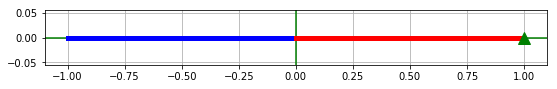

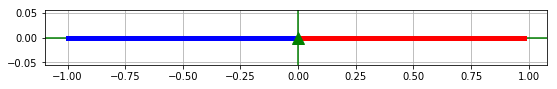

In [27]:
g.status()
print("\n")
g.takeAction(g.actions[4],prints=True)
print("\n")
g.status()

In [ ]:
# Parameters
Rmax = 1.5
epsilon = 0.5
gamma = 0.3
stateRange = [-1,1]
numIntervals = 200
C = 10
H = 2
EISIterations = 10
Nt = 500
# v.V

In [ ]:
# Run Value Iteration
nValueIteration = 1000
d = discretizer(stateRange,numIntervals)
v = valueIteration(G=g,stateRange=[-1,1],numInterval=numIntervals,C=C,gamma=gamma,discretizer=d)
for i in range(0,nValueIteration):
    v.nextIteration()

In [ ]:
# Building EIS

model = None
slModel = SLModel(d)
for t in range(0,EISIterations): # run for t iterations
    g = EISGame() # Intialize a new game each round
    data = [(0,0)]*Nt
    for k in range(0,Nt): 
        s = sparseSampling(gamma=gamma,G = g,Rmax = Rmax, epsilon = epsilon,model = model ) # Explore
        s.H = H
        s.C = C
        sampledState =  np.random.uniform(-1,1)
        if sampledState <= 0: # Improve
            V = min(s.estimateQ(s.H,sampledState,turn=1)) # player 2
        else:
            V = max(s.estimateQ(s.H,sampledState, turn=0)) # player 1
        data[k]=(sampledState,V) # Generate Data
    model = slModel
    model.updateValues(data)
#     pprint.pprint(model.V)
    plt.scatter(x= list(v.V.values()),y= list(model.V.values()))
    plt.scatter(x = list(v.V.values()),y = list(v.V.values()),color='r',alpha=0.3)
    plt.text(0.3,-0.5, 'Red is expected plot \n as t -> infinity', bbox=dict(facecolor=None, alpha=0.5))    
    plt.xlabel("V*_Hat")
    plt.ylabel("V*_EIS")
    plt.xlim([-1,1.5])
    plt.ylim([-1,1.5])
    plt.title("ValueIteration_V* vs EIS_V* " + "Iteration Number: "+ str(t))
    plt.show()
    